# 1912년 타이타닉 사고의 생존자를 예측하기

## [ 데이터 설명 ]

- scikit-learn 내장 데이터
- 891명의 승객에 대한 데이터. 생존여부 / 좌석 등급 / 성별 / 나이 / 일행 / 자녀 / 운임 등의 feature
    - |Feature| Definition| Value|
    - |survived| 생존 여부| 0 = No, 1 = Yes|
    - |pclass| 티겟 등급 (1등석, 2등석, 3등석)| 1 = 1st, 2 = 2nd, 3 = 3rd|
    - |sex| 성별 | male 남성, female 여성
    - |age| 나이 | ((숫자))
    - |sibsp| 함께 탑승한 배우자, 형제자매의 수 합 | ((숫자))
    - |parch| 함께 탑승한 부모님, 자녀의 수 합 | ((숫자))
    - |fare| 운임 요금 (티켓 가격) | ((숫자))
    - |embarked| 출항지 (한글자) |C = Cherbourg, Q = Queenstown, S = Southampton|
    - |class| 티켓 등급 (단어로) | First, Second, Third
    - |who| 남성/여성/아이 구분 | man, woman, child
    - |adult_male| 성인 남성인지의 여부 | True, False
    - |deck| 선박에서 배정받은 좌석의 구역 | A, B, C, D, E, F, G, 빈 값
    - |embark_town| 출항지 (풀네임) | ((도시이름))
    - |alive| 생존 여부 | yes, no
    - |alone| 혼자인지 여부 | True, False

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## library import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [153]:
# sns 내장 데이터 로딩
titanic_df = sns.load_dataset('titanic')

In [124]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## EDA 탐색적 데이터 분석 수행

In [125]:
# .info() 함수로 데이터 컬럼별 타입(자료형), 값이 있는 행(Non-Null)의 갯수 등을 알 수 있음.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 범주형 컬럼과 수치형 컬럼으로 나누기
범주형 컬럼과, 수치형 컬럼으로 나누어서 리스트를 만듬.(추후 분석 시 반복되는 코드를 줄일 수 있음)

- 범주형(categorical) 데이터는 값이 [1, 2, 3], ["내부", "외부"]와 같이 몇 가지 분류로 한정되는 데이터임.
- 수치형(numerical) 데이터는 값이 1,2,3,5,..., 1.2, 4.51, 3.1415와 같이 숫자 축으로 무한히 위치할 수 있는 데이터임.

In [126]:
# 범주형 데이터 column 이름만 추출
categorical_cols = titanic_df.select_dtypes(exclude=np.number).columns.tolist()
# categorical_cols = titanic_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(categorical_cols)

['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [127]:
# 범주형 데이터 Feature로만 구성된 Dataframe 만들기(중복 컬럼 제외)
categorical_cols = ['sex', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
titanic_df[categorical_cols]

,sex,class,who,adult_male,deck,embark_town,alive,alone
0,male,Third,man,True,NaN,Southampton,no,False
1,female,First,woman,False,C,Cherbourg,yes,False
2,female,Third,woman,False,NaN,Southampton,yes,True
3,female,First,woman,False,C,Southampton,yes,False
4,male,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...
886,male,Second,man,True,NaN,Southampton,no,True
887,female,First,woman,False,B,Southampton,yes,True
888,female,Third,woman,False,NaN,Southampton,no,False
889,male,First,man,True,C,Cherbourg,yes,True


In [128]:
# 수치형 데이터 컬럼 이름 추출

numerical_cols = titanic_df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [129]:
#[문제] 수치형 데이터 Feature로만 구성된 Dataframe 만들기

numerical_cols = ['age', 'sibsp', 'parch', 'fare']
titanic_df[numerical_cols]

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,NaN,1,2,23.4500
889,26.0,0,0,30.0000


In [130]:
# age 컬럼 type을 int로 변경 시도함
titanic_df["age"] = titanic_df["age"].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [15]:
titanic_df["age"] = titanic_df["age"].fillna(0)

In [131]:
# age 컬럼의 null 값 확인, 데이터의 사실 분석을 위해 null 값은 그대로 유지
titanic_df['age'].isnull().value_counts()

age
False    714
True     177
Name: count, dtype: int64

### 데이터의 통계량 살펴보기

.describe() 함수로 각 열에 대한 대략적인 통계 값들을 볼 수 있음.
(평균, 상위 25/50/75% 값, 최대/최소 값 등)

In [132]:
titanic_df[numerical_cols].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [133]:
titanic_df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

## [문제해결] .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있음.

In [134]:
# 범주형 데이터 컬럼들의 value count를 계산하는 반복문 구현하기
titanic_cols = titanic_df[categorical_cols].columns
# print(titanic_cols)
for key in titanic_cols:
    print("카운트::")
    # print(titanic_df[key].value_counts())
    print(titanic_df.loc[:, key].value_counts())
    print("-"*60)

카운트::
sex
male      577
female    314
Name: count, dtype: int64
------------------------------------------------------------
카운트::
class
Third     491
First     216
Second    184
Name: count, dtype: int64
------------------------------------------------------------
카운트::
who
man      537
woman    271
child     83
Name: count, dtype: int64
------------------------------------------------------------
카운트::
adult_male
True     537
False    354
Name: count, dtype: int64
------------------------------------------------------------
카운트::
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
------------------------------------------------------------
카운트::
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
------------------------------------------------------------
카운트::
alive
no     549
yes    342
Name: count, dtype: int64
------------------------------------------------------------
카운트::
alone
True     537
False 

### 데이터의 분포 시각화

수치형 컬럼들의 분포를 그려보자. 통계량은 boxplot으로 살펴보고, 분포는 histplot으로 그리기
- 반복문을 이용하여 여러개의 차트를 그리기
- plt.subplots를 통해 여러 개의 canvas를 생성함. (nrows × ncols)
- for문 안에서는 canvas(ax)에 seaborn으로 차트 그리기 figure는 그림 전체를 의미함.


**boxplot 설명**  
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

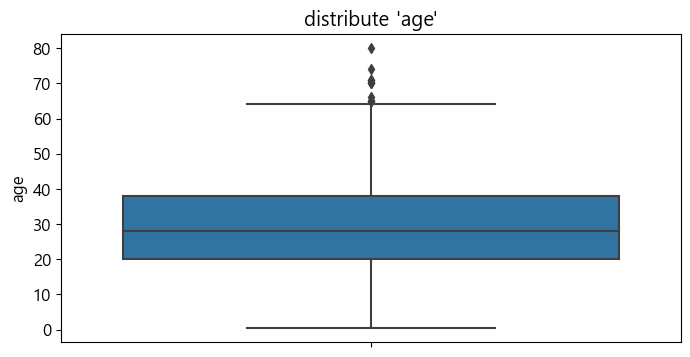

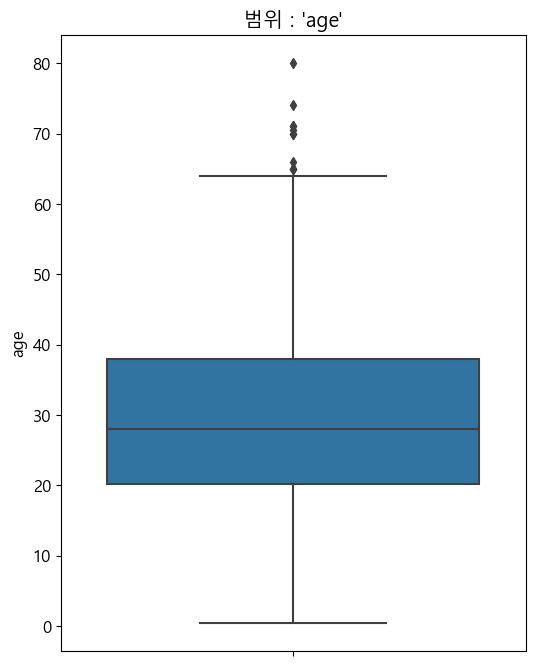

In [135]:
# age 컬럼의 분포 통계량 확인 하기

sns.boxplot(data=titanic_df, y=titanic_df["age"], showfliers=True)
plt.title("distribute 'age'")

plt.figure(figsize=(6, 8))
ax = sns.boxplot(data=titanic_df, y="age", showfliers=True)
ax.set_title("범위 : 'age'")
plt.show()

In [33]:
numerical_cols

['age', 'sibsp', 'parch', 'fare']

### 수치형 데이터를 boxplot으로 하나의 차트에 표현하기, plt.subplots() 활용

(4,)


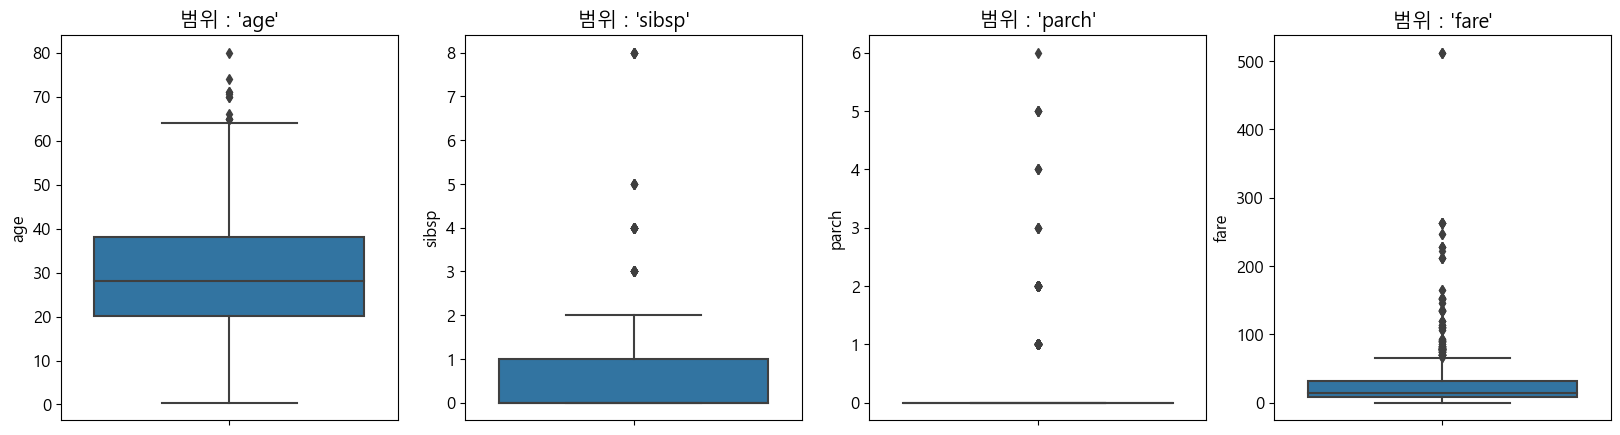

In [136]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,5)
print(ax_list.shape)

for i in range(len(ax_list)):
    col = numerical_cols[i]
    sns.boxplot(data=titanic_df[numerical_cols], y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"범위 : '{col}'")

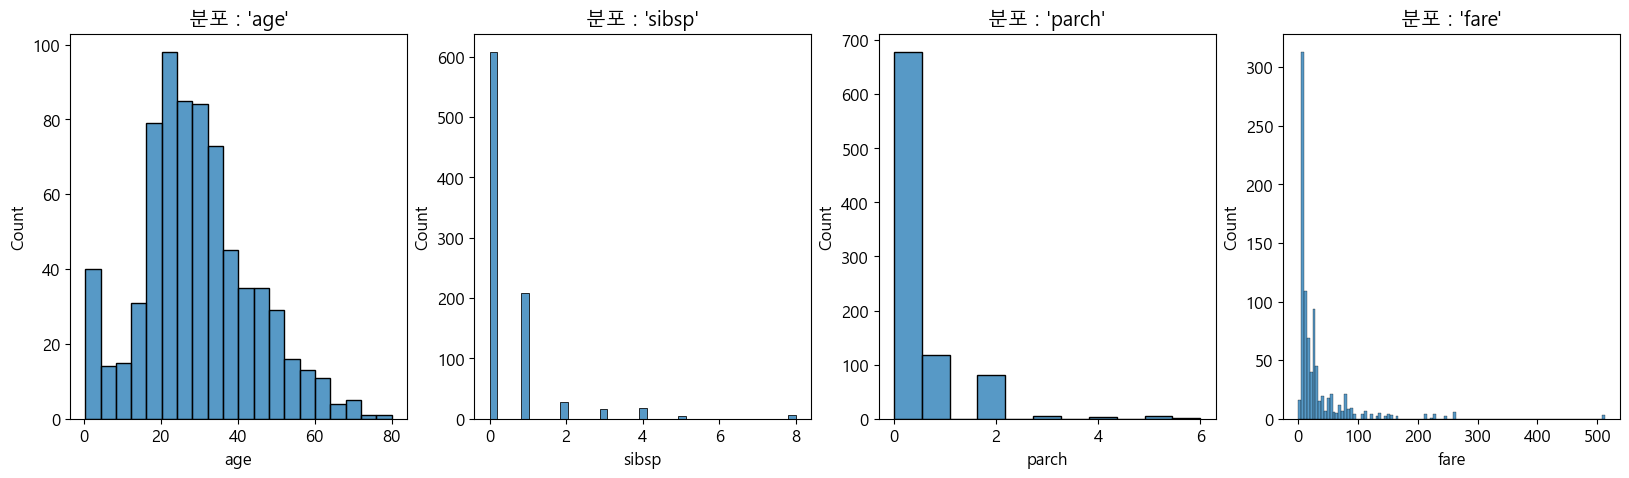

In [137]:
figure, ax_list = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,5)
# print(ax_list.shape)
# sns.histplot(data=titanic_df[numerical_cols], x="age")

for num in range(len(ax_list)):
    # print(num)
    col = numerical_cols[num]
    # print(col)
    sns.histplot(data=titanic_df[numerical_cols], x=col, ax=ax_list[num])
    ax_list[num].set_title(f"분포 : '{col}'")

범주형 컬럼들의 분포 그리기. 범주형이므로 countplot을 통해 각 범주별로 개수를 셀 수 있음.

- 범주형 컬럼이 총 8개 이므로, 3x3 canvas 레이아웃으로 하나씩 그래프를 그려봄.
- ax_list는 [[], []] 형태의 2차원 리스트임. for 문으로 반복하기 위해 1차원 리스트로 풀어보기
- 1차원 리스트 ax_list2가 9개의 canvas (ax)를 갖도록 풀어서 할당하는데, `.reshape()` 라는 numpy함수 사용

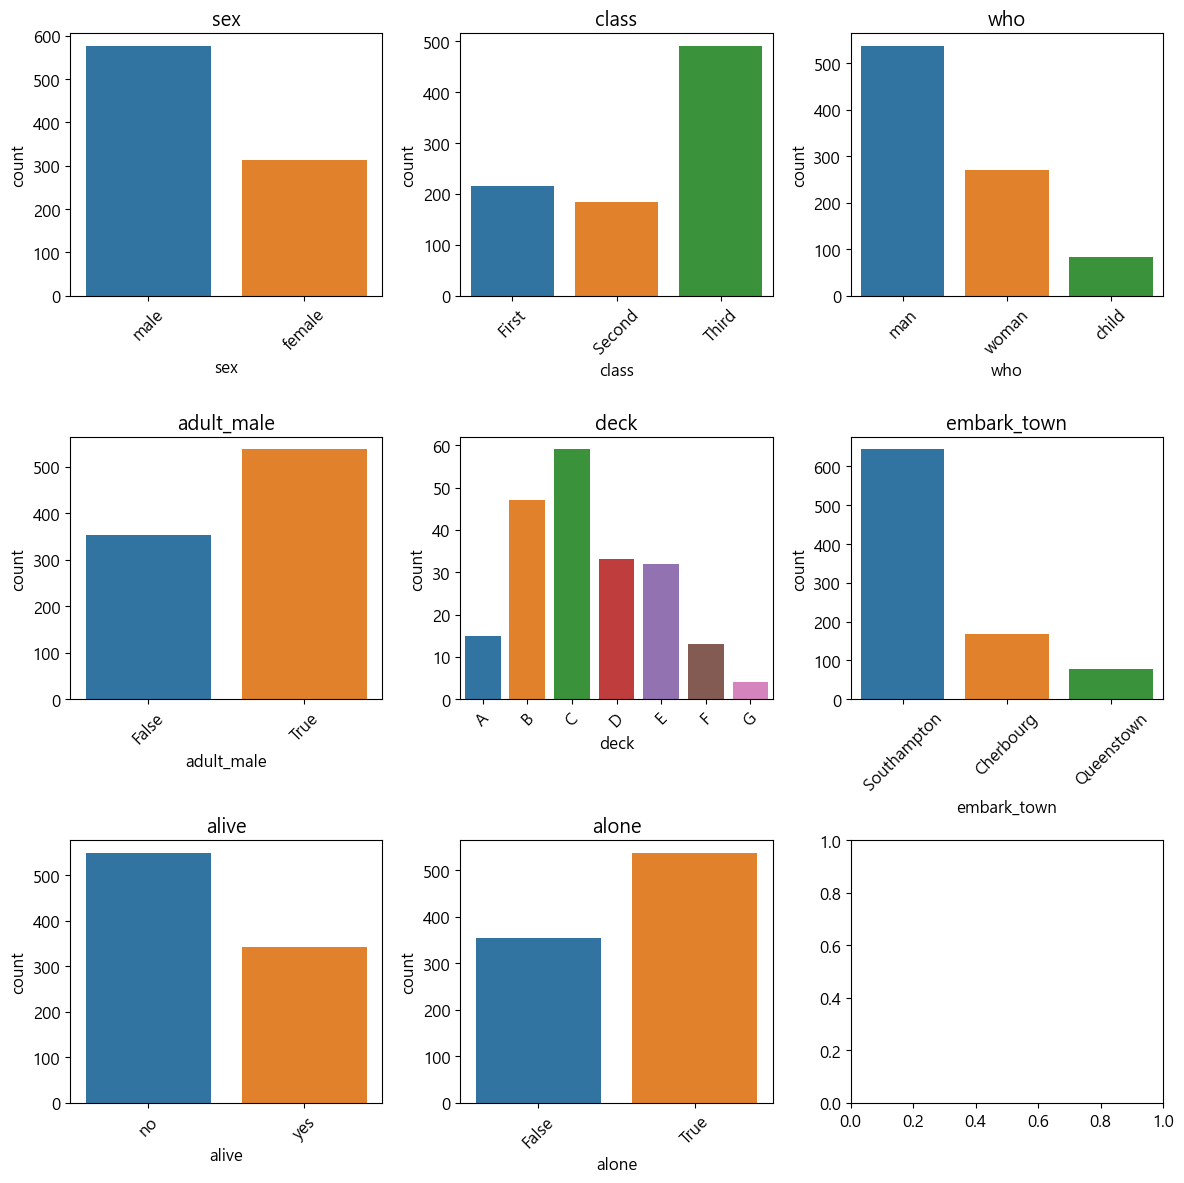

In [138]:
nrows, ncols = 3, 3
figure, ax_list = plt.subplots(nrows=nrows, ncols=ncols);
figure.set_size_inches(12, 12) # 그래프 크기
# 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
ax_list2 = ax_list.reshape(3 * 3) # indexing을 위해 reshape 함
# print(ax_list.shape)
# print(ax_list2.shape)
# print(len(ax_list))
# print(len(ax_list2))
# print(len(categorical_cols))


for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    # print(col)
    # print(ax_list2[i])
    fig = sns.countplot(data=titanic_df[categorical_cols], x=col, ax=ax_list2[i]) # ax=그래프 위치
    fig.set_title(col)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()

### 데이터로부터 유의미한 정보 발굴하기

각 피처들이 타겟에 해당하는 탑승객의 '생존'에 어떤 것들이 영향을 미칠까?
몇 가지 가설을 세우고 그래프를 그려 '생존'에 영향을 미치는 요인이 무엇인지 살펴보자.


### 성별과 생존 여부

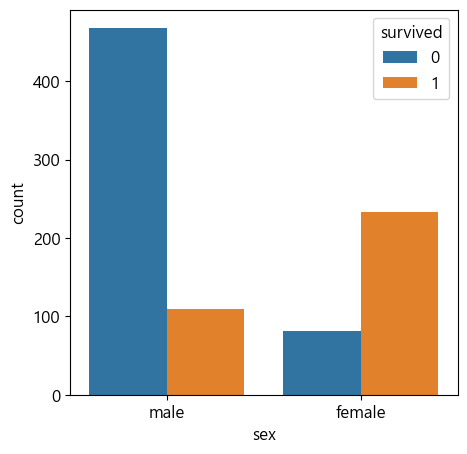

In [139]:
plt.figure(figsize=(5,5))
sns.countplot(data=titanic_df, x='sex', hue='survived');

### 좌석 등급과 생존 여부

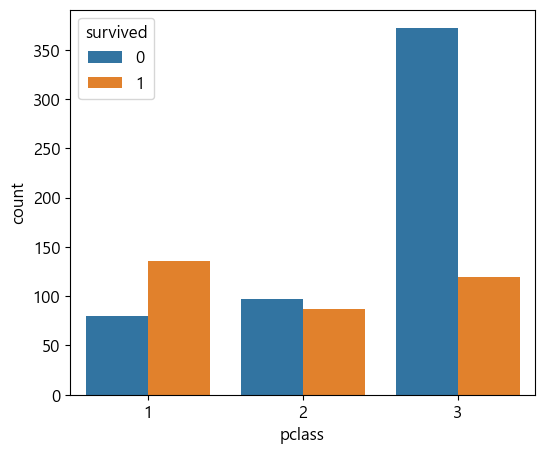

In [140]:
plt.figure(figsize=(6,5))
sns.countplot(data=titanic_df, x='pclass', hue='survived');

## [문제해결] 8개의 범주형 분류에 대해, 생존 여부로 그래프 그리기

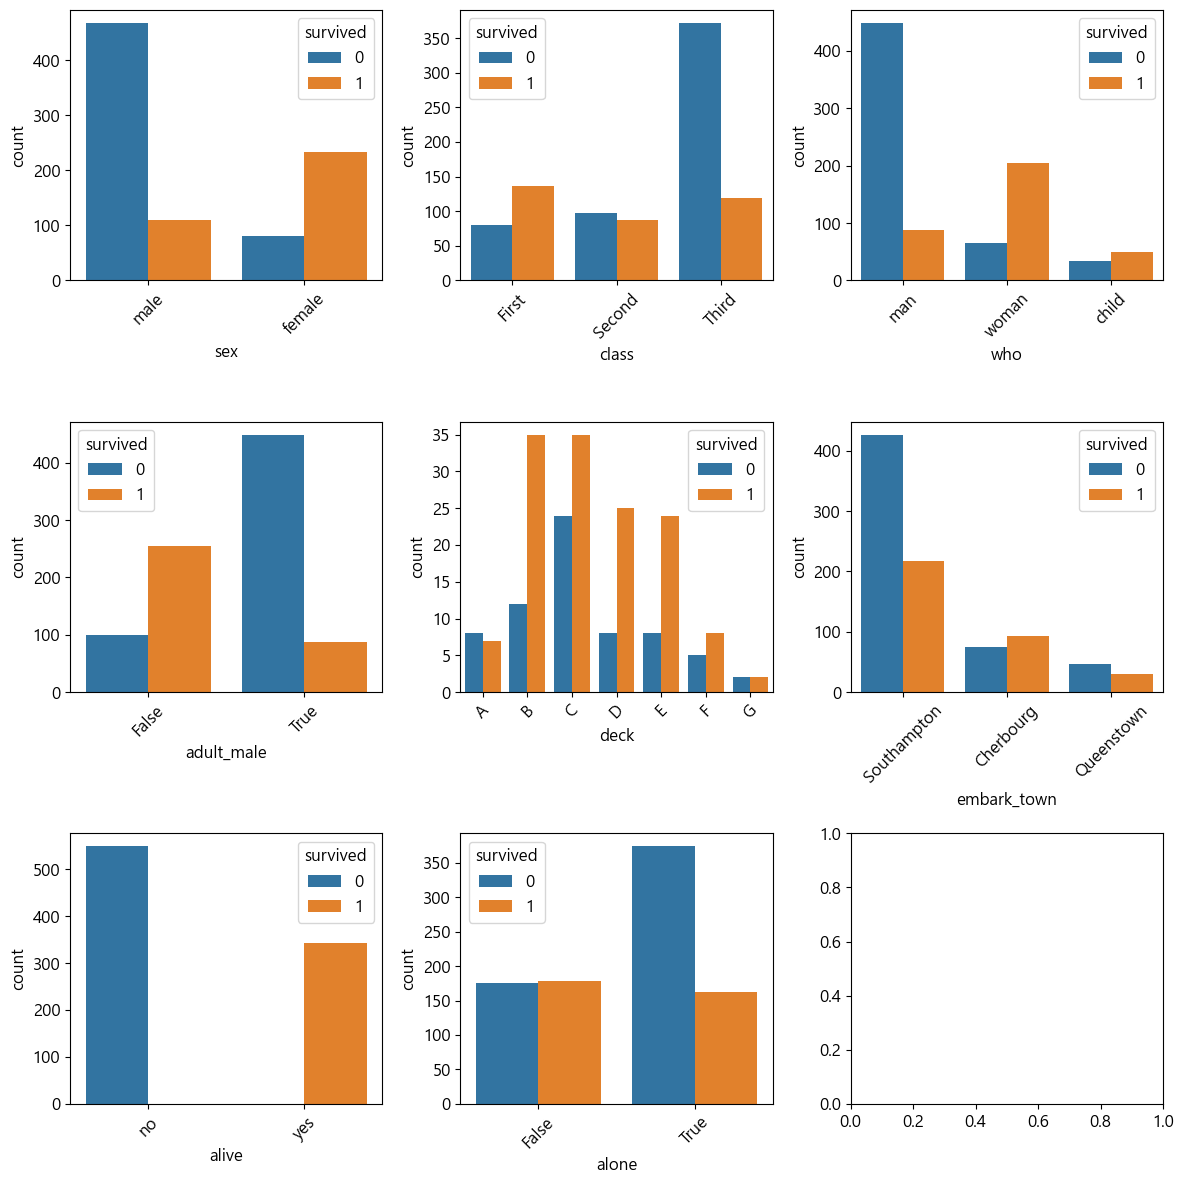

In [141]:
# hue 인자로 'survived' 컬럼을 입력, 각 분류형 데이터 별로 생존/사망 분리하여 살펴보기
nrows, ncols = 3, 3
figure, ax_list = plt.subplots(nrows=nrows, ncols=ncols, constrained_layout=True);
figure.set_size_inches(12, 12) # 그래프 크기
# 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
ax_list2 = ax_list.reshape(3 * 3) # indexing을 위해 reshape 함

for i in range(len(categorical_cols)):
    col = categorical_cols[i]
    # print(col)
    # print(ax_list2[i])
    fig = sns.countplot(data=titanic_df, x=col, hue="survived", ax=ax_list2[i]) # ax=그래프 위치
    fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### [분석 결과]

- 남성보다 여성의 생존률이 더 높다 (여성 > 아이 > 남성)
- 탑승지(embarked)가 C인 경우 생존율이 높다
- 1등석 > 2등석 > 3등석 순으로 생존율이 높다
- B,D,E 덱 위치의 승객들이 생존율이 높다
- 나홀로 승객은 상대적으로 생존율이 낮다

생존 여부별로 나이의 히스토그램 그려보기

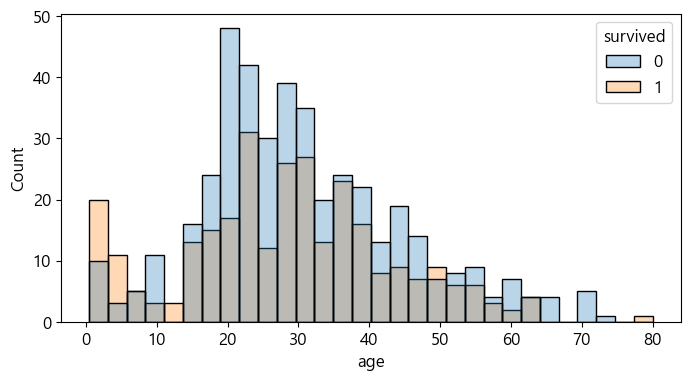

In [142]:
sns.histplot(data=titanic_df, x='age', hue='survived', bins=30, alpha=0.3);

성별과 좌석 등급에 따라, 나이의 boxplot 그려보기

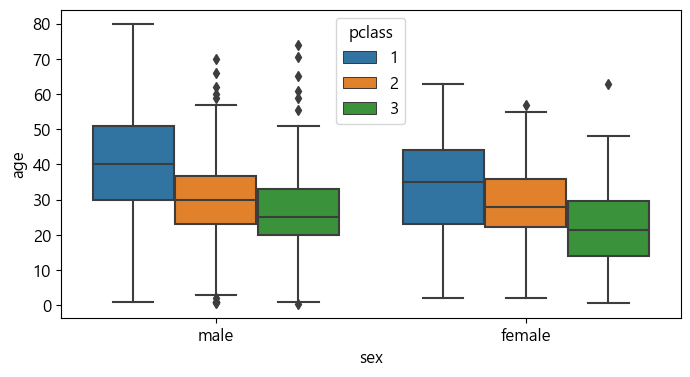

In [143]:
sns.boxplot(data=titanic_df, x='sex', y='age', hue='pclass');

##### 3등석과 2등석에서 남성들의 데이터에 이상치가 많이 보이는 요인 살펴보기

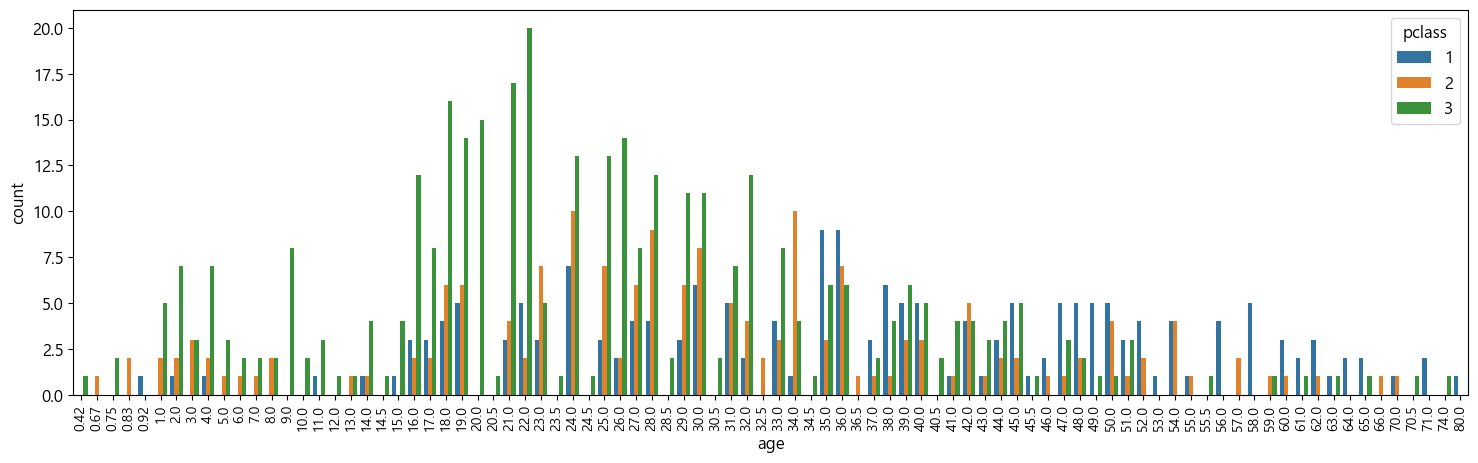

In [154]:
plt.figure(figsize=(18,5))
sns.countplot(data=titanic_df, x='age', hue='pclass');
plt.xticks(rotation=90, fontsize=10)
plt.show()

## 머신러닝을 위한 데이터 전처리
- 결측 데이터 처리
- 문자형 데이터를 숫자형 데이터로 변환(레이블 인코딩, 원핫 인코딩)
- 피처스케일링(데이터의 수준을 맞춰주는 것)

### 결측 데이터 처리하기
- 숫자형 데이터, 범주형 데이터를 어떻게 처리할 것인가?
- 데이터
    - deck : 선박에서 배정받은 좌석의 구역
    - sibsp : 함께 탑승한 형제, 자매, 배우자 수의 합
    - parch : 함께 탑승한 부모, 자식 수의 합

In [145]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### 수치형 데이터의 기술통계 확인

In [146]:
titanic_df[numerical_cols].describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### 카테고리형 데이터의 기술통계 확인

In [147]:
titanic_df[categorical_cols].describe()

,sex,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,891,891,203,889,891,891
unique,2,3,3,2,7,3,2,2
top,male,Third,man,True,C,Southampton,no,True
freq,577,491,537,537,59,644,549,537


### 결측치 처리 방법 결정
- age : 평균값으로 채워넣음
- deck : 빈도수가 top인 값으로 넣기
- embarkded : 빈도수가 top 값으로 넣기

#### [문제해결] numerical value : 결측치 평균나이로 채우기

In [155]:
# age 평균을 채우기

# print(titanic_df["age"].mean())
titanic_df["age"] = titanic_df["age"].fillna(titanic_df["age"].mean())

#### [문제해결] categorical value : 제일 빈번하게 나타나는 값으로 채우기

In [162]:
print(categorical_cols)

['sex', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [168]:
# deck, embarked 최빈값 top으로 채우기
titanic_df["deck"] = titanic_df["deck"].fillna(titanic_df["deck"].describe()["top"])

In [170]:
titanic_df["embarked"] = titanic_df["embarked"].fillna(titanic_df["embarked"].describe()["top"])

In [171]:
# 결측치 채워 졌는지 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### [문제해결] drop duplicated columns(중복된 컬럼 삭제)

In [177]:
drop_cols = ["class", "embark_town", "alive"]
# print(titanic_df.drop(drop_cols, axis=1))

titanic_df_clean = titanic_df.drop(drop_cols, axis=1)

In [178]:
titanic_df_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.000000,1,0,7.2500,S,man,True,C,False
1,1,1,female,38.000000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.000000,0,0,7.9250,S,woman,False,C,True
3,1,1,female,35.000000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.000000,0,0,8.0500,S,man,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,man,True,C,True
887,1,1,female,19.000000,0,0,30.0000,S,woman,False,B,True
888,0,3,female,29.699118,1,2,23.4500,S,woman,False,C,False
889,1,1,male,26.000000,0,0,30.0000,C,man,True,C,True


### 머신러닝은 숫자형 데이터 만 입력할 수 있는데 문자형은 어떻게 처리해야할까?
- string type을 numerical type으로 변형 => label encoding

In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
le = LabelEncoder()
titanic_df_clean['sex'] = le.fit(titanic_df_clean['sex']).transform(titanic_df_clean['sex'])
titanic_df_clean['adult_male'] = le.fit(titanic_df_clean['adult_male']).transform(titanic_df_clean['adult_male'])
titanic_df_clean['alone'] = le.fit(titanic_df_clean['alone']).transform(titanic_df_clean['alone'])
titanic_df_clean['embarked'] = le.fit(titanic_df_clean['embarked']).transform(titanic_df_clean['embarked'])
titanic_df_clean['deck'] = le.fit(titanic_df_clean['deck']).transform(titanic_df_clean['deck'])
titanic_df_clean['who'] = le.fit(titanic_df_clean['who']).transform(titanic_df_clean['who'])

In [181]:
titanic_df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,2,1,1,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,2,0,2,1
3,1,1,0,35.0,1,0,53.1000,2,2,0,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,1


In [182]:
# age 컬럼 int type으로 변경
titanic_df_clean['age'] = titanic_df_clean['age'].astype(int)
titanic_df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,1,22,1,0,7.2500,2,1,1,2,0
1,1,1,0,38,1,0,71.2833,0,2,0,2,0
2,1,3,0,26,0,0,7.9250,2,2,0,2,1
3,1,1,0,35,1,0,53.1000,2,2,0,2,0
4,0,3,1,35,0,0,8.0500,2,1,1,2,1


- titanic_df_clean 데이트 파일로 저장하기

In [183]:
import os
if not os.path.exists('ml_datas'):
    os.mkdir('ml_datas')
titanic_df_clean.to_csv('ml_datas/titanic_df_clean.csv', index=False)    

## 머신러닝 모델 학습 및 모델 평가

### 학습데이터, 테스트 데이터 준비

X_train_feature, X_text_feature, y_train_target, y_test_target = train_test_split(feature_data, target_data)
- test_size : train 데이터와 test 데이터 분할 비율, default 0.25
- shuffle : split을 하기전에 섞을 건지 설정, default=True
- stratify : class 비율을 train과 validation을 일정하게 유지함, 한쪽으로 쏠려서 분배되는 것 방지(stratify=target), default=None
- random_state ; 매번 동일한 데이터 셋으로 분할하는 것을 재현하기 위해 동일한 숫자를 설정함. default=None


In [185]:
df_clean = pd.read_csv("ml_datas/titanic_df_clean.csv")
df_clean.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

### [문제해결] X 데이터, y 데이터 분할

In [186]:
X = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male', 'deck', 'alone']
data_X = df_clean[X]
y = df_clean['survived']

In [188]:
print(data_X.head())
print(y.head())
print(data_X.shape, y.shape)

   pclass  sex  age  sibsp  parch     fare  embarked  who  adult_male  deck  \
0       3    1   22      1      0   7.2500         2    1           1     2   
1       1    0   38      1      0  71.2833         0    2           0     2   
2       3    0   26      0      0   7.9250         2    2           0     2   
3       1    0   35      1      0  53.1000         2    2           0     2   
4       3    1   35      0      0   8.0500         2    1           1     2   

   alone  
0      0  
1      0  
2      1  
3      0  
4      1  
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64
(891, 11) (891,)


### [문제해결] train 데이터, test 데이터 분할

In [198]:
X_train_feature, X_test_feature, y_train_target, y_test_target = train_test_split(data_X, y, test_size=0.2, stratify=y, random_state=10)

In [204]:
print(X_train_feature.shape, y_train_target.shape)

(712, 11) (712,)


In [205]:
print(X_test_feature.shape, y_test_target.shape)

(179, 11) (179,)


In [199]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train_feature, y_train_target)
y_pred = model_dtc.predict(X_test_feature)

In [200]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

### 모델 성능 평가

In [201]:
print('예측 정확도: %.2f' % accuracy_score(y_test_target, y_pred))

예측 정확도: 0.75


### [문제해결] classification report 확인
- accuracy, precision, recall, f1-score 모두 보기

In [202]:
# Predict를 수행하고 classification_report() 결과 출력하기
from sklearn.metrics import classification_report

In [203]:
print(classification_report(y_pred, y_test_target))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       119
           1       0.61      0.70      0.65        60

    accuracy                           0.75       179
   macro avg       0.72      0.74      0.73       179
weighted avg       0.76      0.75      0.75       179



- Precision(정밀도)란 모델이 True라고 분류한 것 중에서 실제 True인 것의 비율
- Recall(재현율) : 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율
- Precision-Recall Trade-off : 둘의 조화평균 1 score